<a href="https://colab.research.google.com/github/galib96/drug-discovery-ml/blob/main/Bioinformatics_Drug_Discovery_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install chembl-webresource-client

     |████████████████████████████████| 55 kB 2.3 MB/s 
     |████████████████████████████████| 596 kB 10.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.2 which is incompatible.


In [2]:
import pandas as pd
import numpy as np

from chembl_webresource_client.new_client import new_client

In [3]:
# target search for Dengue virus

target = new_client.target
target_query = target.search("Dengue virus")
target_df = pd.DataFrame.from_dict(target_query)

target_df

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Dengue virus,Dengue virus,24.0,False,CHEMBL613757,[],ORGANISM,12637
1,[],Dengue virus 1,Dengue virus 1,21.0,False,CHEMBL613360,[],ORGANISM,11053
2,[],Dengue virus 2,Dengue virus 2,21.0,False,CHEMBL613966,[],ORGANISM,11060
3,[],Dengue virus 3,Dengue virus 3,21.0,False,CHEMBL612717,[],ORGANISM,11069
4,[],Dengue virus 4,Dengue virus type 4,18.0,False,CHEMBL613728,[],ORGANISM,11070
...,...,...,...,...,...,...,...,...,...
165,"[{'xref_id': 'P10274', 'xref_name': None, 'xre...",Human T-cell leukemia virus 1 (strain Japan AT...,Human T-cell leukemia virus type I protease,4.0,False,CHEMBL3346,"[{'accession': 'P10274', 'component_descriptio...",SINGLE PROTEIN,11926
166,[],Human immunodeficiency virus type 1 (RF/HAT IS...,Human immunodeficiency virus type 1 (RF/HAT IS...,4.0,False,CHEMBL613498,[],ORGANISM,11701
167,"[{'xref_id': 'Q69422', 'xref_name': None, 'xre...",Hepatitis GB virus B,Hepatitis GB virus B NS5B RNA-dependent RNA po...,4.0,False,CHEMBL5981,"[{'accession': 'Q69422', 'component_descriptio...",SINGLE PROTEIN,39113
168,[],Homo sapiens,Sharpin/RBCK1/RNF31,4.0,False,CHEMBL4296109,"[{'accession': 'Q9H0F6', 'component_descriptio...",PROTEIN COMPLEX,9606


In [4]:
target_df[(target_df['target_type']=='SINGLE PROTEIN') & (target_df['organism']=='Dengue virus')]

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
6,[],Dengue virus,Nonstructural protein 5,14.0,False,CHEMBL4295629,"[{'accession': 'V5TFZ2', 'component_descriptio...",SINGLE PROTEIN,12637


In [5]:
selected_target = target_df.target_chembl_id[6]
selected_target

'CHEMBL4295629'

In [6]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type='IC50')

In [7]:
df = pd.DataFrame.from_dict(res)
df.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,18297472,[],CHEMBL4123978,Inhibition of Dengue virus 4 NS5 full length R...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,0.34
1,None,18297475,[],CHEMBL4123975,Inhibition of Dengue virus 2 NS5 full length R...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,0.36
2,None,18297488,[],CHEMBL4123982,Inhibition of Dengue virus RdRp activity using...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,5.0
3,None,18297489,[],CHEMBL4123982,Inhibition of Dengue virus RdRp activity using...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,1.6
4,None,18297490,[],CHEMBL4123982,Inhibition of Dengue virus RdRp activity using...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,2.0


In [8]:
df.standard_type.unique()

array(['IC50'], dtype=object)

In [9]:
df.to_csv('bioactivity_data_dengue.csv', index=False)

In [10]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
#!mkdir '/content/gdrive/My Drive/Colab Notebooks/Bioinformatics Project/data'

In [11]:
!cp bioactivity_data_dengue.csv '/content/gdrive/My Drive/Colab Notebooks/Bioinformatics Project/data'

In [12]:
df_clean = df[df['standard_value'].notna()]
df_clean = df_clean[df_clean['canonical_smiles'].notna()]
df_clean.drop_duplicates(['canonical_smiles'], inplace = True)

print(df_clean.shape)
df_clean.head()

(62, 45)


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,18297472,[],CHEMBL4123978,Inhibition of Dengue virus 4 NS5 full length R...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,0.34
1,None,18297475,[],CHEMBL4123975,Inhibition of Dengue virus 2 NS5 full length R...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,0.36
2,None,18297488,[],CHEMBL4123982,Inhibition of Dengue virus RdRp activity using...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,5.0
3,None,18297489,[],CHEMBL4123982,Inhibition of Dengue virus RdRp activity using...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,1.6
4,None,18297490,[],CHEMBL4123982,Inhibition of Dengue virus RdRp activity using...,B,None,None,BAO_0000190,BAO_0000357,...,Dengue virus,Nonstructural protein 5,12637,None,None,IC50,uM,UO_0000065,None,2.0


In [13]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df_activity = df_clean[selection]

df_activity.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,340.0
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,360.0
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,5000.0
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,1600.0
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,2000.0


In [14]:
def activity_classifier(sv):

    if float(sv) >= 10000:
        return "inactive"
    elif float(sv) <= 1000:
        return "active"
    else:
        return "intermediate"

In [15]:
df_activity['class'] = df_activity['standard_value'].apply(activity_classifier)

df_activity.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,340.0,active
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,360.0,active
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,5000.0,intermediate
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,1600.0,intermediate
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,2000.0,intermediate


In [16]:
df_activity.to_csv("bioactivity_dengue_preprocessed_data.csv", index=False)

!cp bioactivity_dengue_preprocessed_data.csv '/content/gdrive/My Drive/Colab Notebooks/Bioinformatics Project/data'

In [17]:
!pip install rdkit-pypi

     |████████████████████████████████| 22.7 MB 1.6 MB/s 


In [18]:
df_proc = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Bioinformatics Project/data/bioactivity_dengue_preprocessed_data.csv")
df_proc.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,340.0,active
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,360.0,active
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,5000.0,intermediate
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,1600.0,intermediate
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,2000.0,intermediate


##Lipinski's descriptors

Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

In [19]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [20]:
# calculate descriptors and lipinski values

df_proc['canonical_smiles_mol'] = df_proc['canonical_smiles'].apply(Chem.MolFromSmiles)
df_proc['mol_wt'] = df_proc['canonical_smiles_mol'].apply(Descriptors.MolWt)
df_proc['mol_logp'] = df_proc['canonical_smiles_mol'].apply(Descriptors.MolLogP)
df_proc['num_H_donors'] = df_proc['canonical_smiles_mol'].apply(Lipinski.NumHDonors)
df_proc['num_H_acceptors'] = df_proc['canonical_smiles_mol'].apply(Lipinski.NumHAcceptors)

df_proc.head()

,molecule_chembl_id,canonical_smiles,standard_value,class,canonical_smiles_mol,mol_wt,mol_logp,num_H_donors,num_H_acceptors
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,340.0,active,<rdkit.Chem.rdchem.Mol object at 0x7f6330371bc0>,531.204,-1.13022,7,14
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,360.0,active,<rdkit.Chem.rdchem.Mol object at 0x7f6330371d50>,524.169,-1.57400,7,14
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,5000.0,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7f6330371d00>,498.167,-2.11080,7,12
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,1600.0,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7f6330371cb0>,508.162,-2.49750,7,12
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,2000.0,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7f6330371da0>,522.189,-2.10740,7,12


In [21]:
def norm(x):
    """
    to limit the standard value to 100  million
    """
    if x > 100000000:
        x = 100000000
    return x

In [22]:
# restricting the standard value by applying the norm function and log10

df_proc['pIC50'] = np.log10(df_proc['standard_value'].apply(norm))
df_proc.head()

,molecule_chembl_id,canonical_smiles,standard_value,class,canonical_smiles_mol,mol_wt,mol_logp,num_H_donors,num_H_acceptors,pIC50
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,340.0,active,<rdkit.Chem.rdchem.Mol object at 0x7f6330371bc0>,531.204,-1.13022,7,14,2.531479
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,360.0,active,<rdkit.Chem.rdchem.Mol object at 0x7f6330371d50>,524.169,-1.57400,7,14,2.556303
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,5000.0,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7f6330371d00>,498.167,-2.11080,7,12,3.698970
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,1600.0,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7f6330371cb0>,508.162,-2.49750,7,12,3.204120
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,2000.0,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7f6330371da0>,522.189,-2.10740,7,12,3.301030


In [23]:
# getting statistics of pIC50 values

df_proc['pIC50'].describe()

count    62.000000
mean      4.156202
std       1.052163
min       1.204120
25%       3.423020
50%       4.173938
75%       5.129120
max       5.655138
Name: pIC50, dtype: float64

In [24]:
# dropping the intermediate class

df2 = df_proc[df_proc['class'] != 'intermediate']
df2.head()

,molecule_chembl_id,canonical_smiles,standard_value,class,canonical_smiles_mol,mol_wt,mol_logp,num_H_donors,num_H_acceptors,pIC50
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,340.0,active,<rdkit.Chem.rdchem.Mol object at 0x7f6330371bc0>,531.204,-1.13022,7,14,2.531479
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,360.0,active,<rdkit.Chem.rdchem.Mol object at 0x7f6330371d50>,524.169,-1.57400,7,14,2.556303
5,CHEMBL486231,C[C@@]1(F)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,18000.0,inactive,<rdkit.Chem.rdchem.Mol object at 0x7f6330371df0>,500.158,-1.13360,6,11,4.255273
6,CHEMBL4127921,C#C[C@@]1(F)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,15900.0,inactive,<rdkit.Chem.rdchem.Mol object at 0x7f6330371e40>,510.153,-1.52030,6,11,4.201397
7,CHEMBL4129313,CC#C[C@@]1(F)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,20000.0,inactive,<rdkit.Chem.rdchem.Mol object at 0x7f6330371e90>,524.180,-1.13020,6,11,4.301030


In [25]:
import seaborn as sns
sns.set(style= 'ticks')
import matplotlib.pyplot as plt
%matplotlib inline

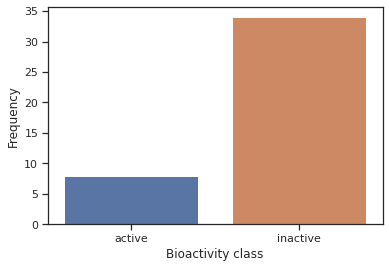

In [26]:
# frequency of Bioactivity class

sns.countplot(x='class', data=df2)

plt.xlabel('Bioactivity class')
plt.ylabel('Frequency')

plt.savefig('plot_bioactivity_class.pdf')

plt.show()

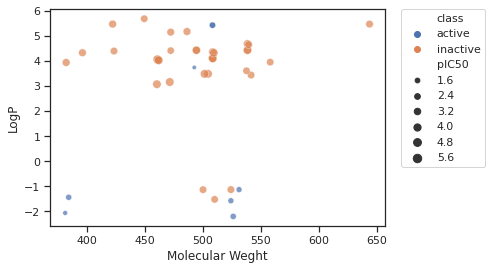

In [27]:
# molecular weight and log of standard P value

sns.scatterplot(x='mol_wt', y='mol_logp', data=df2, hue='class', size='pIC50', alpha = 0.7)

plt.xlabel('Molecular Weght')
plt.ylabel('LogP')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
plt.savefig('plot_mw_vs_logp.pdf')

plt.show()

### Mann-Whitney U significance test

In [29]:
# Running Mann-Whitney U test for statstically significant difference between classes

from numpy.random import seed, randn
from scipy.stats import mannwhitneyu

seed (1)

def whhitney_test(descriptor, verbose=False):

    """
    function to run mann-whitney U test
    """

    selection = [descriptor, 'class']
    df = df2[selection]
    active = df[df['class'] == 'active']
    active = active[descriptor]

    selection = [descriptor, 'class']
    df = df2[selection]
    inactive = df[df['class'] == 'inactive']
    inactive = inactive[descriptor]

    # compare samples
    stat, p = mannwhitneyu(active, inactive)

    # interpretattion
    alpha = 0.05
    if p > alpha:
        inter = "No significant difference"
    else:
        inter = "Distribution significantly different"

    results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':inter}, index=[0])
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)

    return results

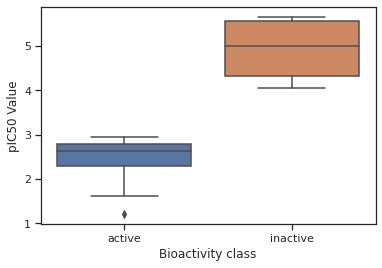

In [28]:
# bioactivity class and pIC50 value

sns.boxplot(x='class', y='pIC50', data=df2)
plt.xlabel('Bioactivity class')
plt.ylabel('pIC50 Value')

plt.savefig('plot_bioactivity_class.pdf')

plt.show()

In [30]:
# whitney test for pIC50
whhitney_test('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.000007,0.05,Distribution significantly different


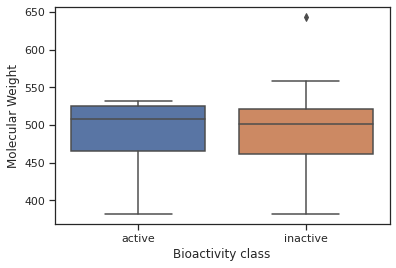

In [34]:
# bioactivity class and molecular weight value

sns.boxplot(x='class', y='mol_wt', data=df2)
plt.xlabel('Bioactivity class')
plt.ylabel('Molecular Weight')

plt.savefig('plot_bioactivity_class.pdf')

plt.show()

In [35]:
# whitney test for pIC50
whhitney_test('mol_wt')

,Descriptor,Statistics,p,alpha,Interpretation
0,mol_wt,130.0,0.430029,0.05,No significant difference


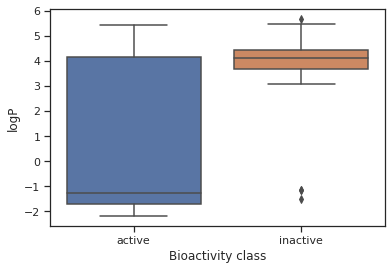

In [39]:
# bioactivity class and log of P value

sns.boxplot(x='class', y='mol_logp', data=df2)
plt.xlabel('Bioactivity class')
plt.ylabel('logP')

plt.savefig('plot_bioactivity_class.pdf')

plt.show()

In [40]:
# whitney test for mol_logP
whhitney_test('mol_logp')

,Descriptor,Statistics,p,alpha,Interpretation
0,mol_logp,74.0,0.024401,0.05,Distribution significantly different


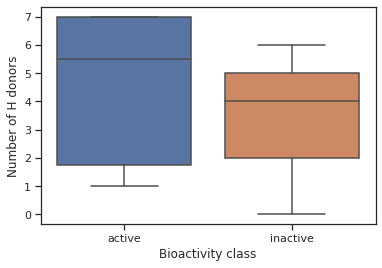

In [41]:
# bioactivity class and num_H_donors

sns.boxplot(x='class', y='num_H_donors', data=df2)
plt.xlabel('Bioactivity class')
plt.ylabel('Number of H donors')

plt.savefig('plot_bioactivity_class.pdf')

plt.show()

In [42]:
# whitney test for num_H_donors
whhitney_test('num_H_donors')

,Descriptor,Statistics,p,alpha,Interpretation
0,num_H_donors,90.5,0.07194,0.05,No significant difference


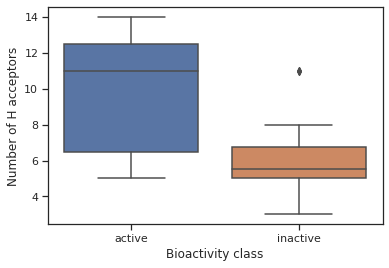

In [43]:
# bioactivity class and num_H_acceptors

sns.boxplot(x='class', y='num_H_acceptors', data=df2)
plt.xlabel('Bioactivity class')
plt.ylabel('Number of H acceptors')

plt.savefig('plot_bioactivity_class.pdf')

plt.show()

In [44]:
# whitney test for number of H acceptors
whhitney_test('num_H_acceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,num_H_acceptors,57.5,0.004856,0.05,Distribution significantly different


### Descriptor Claculations

In [46]:
# Package for Descriptor Calculation

! pip install padelpy

     |████████████████████████████████| 20.9 MB 5.2 MB/s 


In [47]:
df3 = df_proc.copy()

df3.head()

,molecule_chembl_id,canonical_smiles,standard_value,class,canonical_smiles_mol,mol_wt,mol_logp,num_H_donors,num_H_acceptors,pIC50
0,CHEMBL4126343,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,340.0,active,<rdkit.Chem.rdchem.Mol object at 0x7f6330371bc0>,531.204,-1.13022,7,14,2.531479
1,CHEMBL3417270,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,360.0,active,<rdkit.Chem.rdchem.Mol object at 0x7f6330371d50>,524.169,-1.57400,7,14,2.556303
2,CHEMBL521487,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,5000.0,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7f6330371d00>,498.167,-2.11080,7,12,3.698970
3,CHEMBL4127092,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,1600.0,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7f6330371cb0>,508.162,-2.49750,7,12,3.204120
4,CHEMBL4127819,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,2000.0,intermediate,<rdkit.Chem.rdchem.Mol object at 0x7f6330371da0>,522.189,-2.10740,7,12,3.301030


In [52]:
selection = ['canonical_smiles', 'molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index = False, header = False)

df3_selection.head()

,canonical_smiles,molecule_chembl_id
0,N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O...,CHEMBL4126343
1,[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,CHEMBL3417270
2,C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP...,CHEMBL521487
3,C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)...,CHEMBL4127092
4,CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,CHEMBL4127819


In [53]:
! cat molecule.smi | head -5

N#C[C@]1(O)C(n2ccc3c(N)ncnc32)O[C@H](COP(=O)(O)OP(=O)(O)OP(=O)(O)O)[C@H]1O	CHEMBL4126343
[N-]=[N+]=N[C@]1(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O[C@@H](n2ccc(N)nc2=O)[C@H](O)[C@@H]1O	CHEMBL3417270
C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O[C@H]1n1ccc(=O)[nH]c1=O	CHEMBL521487
C#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O[C@H]1n1ccc(=O)[nH]c1=O	CHEMBL4127092
CC#C[C@@]1(O)[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O[C@H]1n1ccc(=O)[nH]c1=O	CHEMBL4127819


In [55]:
! cat molecule.smi | wc -l

62


In [63]:
from padelpy import padeldescriptor

padeldescriptor(mol_dir='/content/molecule.smi', d_file='descriptors.csv', 
                fingerprints=True, removesalt=True, detectaromaticity=True, 
                log=True, retainorder=True)

In [64]:
df3_padel = pd.read_csv('descriptors.csv')
df3_padel

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL4126343,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL3417270,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL521487,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL4127092,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL4127819,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,CHEMBL269277,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,CHEMBL4526128,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,CHEMBL1418094,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,CHEMBL1214186,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df3_padel = df3_padel.drop(columns='Name')
df3_padel.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X = df3_padel.copy()
Y = df3['pIC50']
data_xy = pd.concat([X, Y], axis=1)
data_xy.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.531479
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.556303
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.698970
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.204120
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.301030


In [67]:
data_xy.to_csv('data with descriptors padel.csv', index=False)